# Plots of retrieved RSP cloud parametrs using NN scheme

In [1]:
# import neccesary modules for this module
#-------------------------------------------
import pandas as pd
import numpy as np
import scipy as sio
import scipy.stats as stats
from scipy.interpolate import griddata, interp2d
import glob
import netCDF4 as nc4
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.collections import LineCollection
from matplotlib.patches import Polygon
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap
import shapefile
import os, math, sys
import datetime as dt
import time as tm
import csv
%matplotlib inline

In [18]:
## this function reads retrieved ".txt" files from Matlab
## given flight date, concatanates various files from same
## day if there are multiple and plots timeseries of:
## Reff, Veff, COD, and saves them to figure
## Michal Segal, 05-07-2017
## data_dir = '..//..//py_data//oracles_NN//input2NN//predictions//lut9//'
## subdir is subdirectory of retrieved files (by ref_i_ref_q etc.)
## f_date is string: yyyymmdd
## platform is aircraft: "ER-2" or "P-3"
##---------------------------------------------------------------------------
def plotRSPtimeseries(data_dir,subdir,f_date,platform):
    
    # import moduls
    from os import listdir
    from os.path import isfile, join
    from os import walk
    import pandas as pd
    import glob
    import matplotlib 
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    from matplotlib import cm
    from matplotlib import gridspec
    from matplotlib.collections import LineCollection
    from matplotlib.patches import Polygon
    from matplotlib.patches import Polygon
    from mpl_toolkits.basemap import Basemap
    import shapefile
    %matplotlib inline
    
    # list all files in folder to plot
    expres = data_dir + subdir + '//' + f_date + "T*lut_scale*.txt"  
    flist = glob.glob(expres)
    print "files to process: "
    print flist
    
    ## initialize arrays
    data = pd.DataFrame([])
    # read and concatanate files:
    for f in range(len(flist)):
        print flist[f]
        if (platform =="ER-2"):
            tmp = pd.read_table(flist[f], sep='\s+', header=None,
                   names=["UTC_hr", "Alt_m", "Latitude", "Longitude", "SZA", "RelativeAzimuth","Effective_Radius",
                          "Effective_Variance","COT"])
        elif (platform =="P-3"):
             tmp = pd.read_table(flist[f], sep='\s+', header=None,
                   names=["UTC_hr", "Latitude", "Longitude", "Alt_m", "SZA", "RelativeAzimuth","Effective_Radius",
                          "Effective_Variance","COT"])
            
        print tmp.shape
        print tmp.head()
        # concat arrays
        data=data.append(pd.DataFrame(tmp))
        print "tmp.shape"
        print tmp.shape
    
    print "data.shape"
    print data.shape
    
    # save concat data into .csv file by date
    file_name = data_dir + subdir + '//' + 'NN_RSP_' + f_date + platform + '_' + subdir + ".csv"
    print 'file2save is: ' + file_name
    
    data.to_csv(file_name, header=True, index=False)
    
    ## plot timeseries using all concat files
    plt.figure()
    #ax1 = plt.subplot(3, 1, 1)
    #plt.plot(data['UTC_hr'],data['Effective_Radius'], 'o')
    #ax2 = plt.subplot(3,1,2)
    #plt.plot(data['UTC_hr'],data['Effective_Variance'], 'o')
    #ax3 = plt.subplot(3,1,3)
    #plt.plot(data['UTC_hr'],data['COT'], 'o')
    
    colormap = plt.cm.gist_ncar
    colors = [colormap(i) for i in np.linspace(0, 1, 3)]
    
    # set height ratios for sublots
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1]) 

    # the fisrt subplot
    ax0 = plt.subplot(gs[0])
    line0, = ax0.plot(data['UTC_hr'],data['Effective_Radius'], '.', color='r')
    ax0.set_title(f_date, fontsize = 14)
    #pyplot.locator_params(axis = 'x', nbins = 4)
    # plt.locator_params(axis = 'y',numticks=4)
    ax0.set_yticks([5,10,15,20])
    
    #the second subplot
    # shared axis X
    ax1 = plt.subplot(gs[1], sharex = ax0)
    # log scale for axis Y of the first subplot
    ax1.set_yscale("log")
    line1, = ax1.plot(data['UTC_hr'],data['Effective_Variance'], '.', color='b')
    ax1.set_yticks([1e-3,1e-2,1e-1])
    
    #the third subplot
    # shared axis X
    ax2 = plt.subplot(gs[2], sharex = ax0)
    line2, = ax2.plot(data['UTC_hr'],data['COT'], '.', color='g')
    ax2.set_xlabel('UTC [hr]', fontsize = 12)
    ax2.set_yticks([0,10,20,30,40])
    
    #ax.xaxis.set_label_coords(1.05, -0.025)
    plt.setp(ax0.get_xticklabels(), visible=False)
    plt.setp(ax1.get_xticklabels(), visible=False)
    # remove last tick label for the second subplot
    yticks = ax2.yaxis.get_major_ticks()
    yticks[-1].label1.set_visible(False)

    # put lened on first subplot
    ax1.legend((line0, line1, line2), ('Effective Radius', 'Effective Variance', 'COT'), loc='lower left')

    # remove vertical gap between subplots
    plt.subplots_adjust(hspace=.0)
    #plt.show()

    
    # save figure
    # as pdf
    fi1 = '../../py_figs/oracles_NN/' + 'NN_RSP_' + f_date + "_" + platform + '_reff_veff_cot_timeseries_' + subdir + '.pdf'
    #fig = matplotlib.pyplot.gcf()
    #fig.set_size_inches(13, 9, forward=True)
    plt.savefig(fi1, bbox_inches='tight',dpi=1000)
    # as png
    fi2 = '../../py_figs/oracles_NN/' + 'NN_RSP_' + f_date + "_" + platform + '_reff_veff_cot_timeseries_' + subdir + '.png'
    #fig = matplotlib.pyplot.gcf()
    #fig.set_size_inches(13, 9, forward=True)
    plt.savefig(fi2, bbox_inches='tight',dpi=1000)
    # or set axes interactively
    #for ax in fig.axes:
    #    ax.set_xlim(10, 20)
        
    return flist
    

In [4]:
# test plotRSPtimeseries(data_dir,f_date):
#
#data_dir = '..//..//py_data//oracles_NN//input2NN//predictions//lut9//'
#plotRSPtimeseries(data_dir,"20160927","ER-2")

#data_dir = '..//..//py_data//oracles_NN//input2NN//predictions//lut0//'
#plotRSPtimeseries(data_dir,"ref_q_dolp","20170801","P-3")
#flist[0]
# [utc, alt, lat,lon,sza,relAzi,Reff,Veff,COD];
#tmp = pd.read_table('..\\..\\py_data\\oracles_NN\\input2NN\\predictions\\lut9\\20160910T095856Z_V001-20160912T173255Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt',
                    #sep='\s+', header=None,
                    #names=["UTC_hr", "Alt_m", "Latitude", "Longitude", "SZA", "RelativeAzimuth","Reff","Veff","COT"])
#tmp.head()

files to process: 
['..//..//py_data//oracles_NN//input2NN//predictions//lut9//ref_q_dolp\\20160910T082047Z_V002-20170316T193311Z_NN_ref_q_dolp_090_ER2_ref_q_dolp_090_prediction_lut_scale_with_lut_9.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut9//ref_q_dolp\\20160910T095955Z_V002-20170316T193818Z_NN_ref_q_dolp_090_ER2_ref_q_dolp_090_prediction_lut_scale_with_lut_9.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut9//ref_q_dolp\\20160910T110341Z_V002-20170316T192939Z_NN_ref_q_dolp_090_ER2_ref_q_dolp_090_prediction_lut_scale_with_lut_9.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut9//ref_q_dolp\\20160910T111655Z_V002-20170316T194719Z_NN_ref_q_dolp_090_ER2_ref_q_dolp_090_prediction_lut_scale_with_lut_9.txt']
..//..//py_data//oracles_NN//input2NN//predictions//lut9//ref_q_dolp\20160910T082047Z_V002-20170316T193311Z_NN_ref_q_dolp_090_ER2_ref_q_dolp_090_prediction_lut_scale_with_lut_9.txt
(2135, 9)
     UTC_hr      Alt_m   Latitude  Longitude     

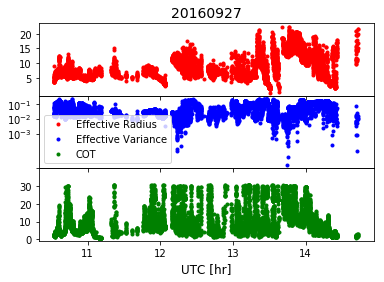

In [19]:
# loop over all campaign dates to get plots
flight_dates = ['20160910','20160912', '20160914', '20160916','20160918','20160920','20160922', '20160924','20160925', '20160927']
data_dir = '..//..//py_data//oracles_NN//input2NN//predictions//lut9//'

for f in range(len(flight_dates)):
    plotRSPtimeseries(data_dir,"ref_q_dolp",flight_dates[f],"ER-2")

files to process: 
['..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170830T080808Z_V001-20170830T235250Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170830T082250Z_V001-20170830T235242Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170830T082844Z_V001-20170830T235328Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170830T090137Z_V001-20170830T235403Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170830T090549Z_V001-20170830T235431Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predi

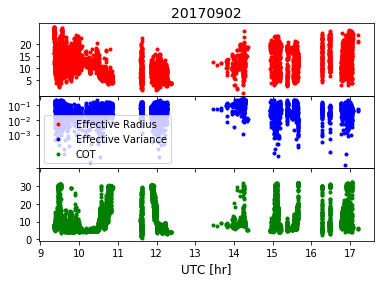

In [7]:
# loop over all campaign dates to get plots
#flight_dates = ['20170815','20170817','20170818','20170819']
#flight_dates = ['20170801','20170807','20170809','20170812','20170813']
#flight_dates = ['20170824']
#flight_dates = ['20170821']
#flight_dates = ['20170826','20170828']
flight_dates = ['20170830','20170831','20170902']
data_dir = '..//..//py_data//oracles_NN//input2NN//predictions//lut0//'

for f in range(len(flight_dates)):
    plotRSPtimeseries(data_dir,"ref_i_ref_q",flight_dates[f],"P-3")

In [8]:
## this function reads retrieved ".txt" files from Matlab
## given flight date, concatanates various files from same
## day if there are multiple and plots spatial maps of:
## Reff, and COD, and saves them to figure
## Michal Segal, 05-07-2017
## data_dir = '..//..//py_data//oracles_NN//input2NN//predictions//lut9//'
## f_date is string: yyyymmdd
## platform is aircraft: "ER-2" or "P-3"
##---------------------------------------------------------------------------
def plotRSPlatlon(data_dir,f_date,platform):
    
    # import moduls
    import numpy as np
    import scipy as sio
    from os import listdir
    from os.path import isfile, join
    from os import walk
    import pandas as pd
    import glob
    import matplotlib 
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    from matplotlib import cm
    from matplotlib import gridspec
    from matplotlib.collections import LineCollection
    from matplotlib.patches import Polygon
    from matplotlib.patches import Polygon
    from mpl_toolkits.basemap import Basemap
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import shapefile
    %matplotlib inline
    
    # list all files in folder to plot
    expres = data_dir + f_date + "T*lut_scale*.txt"  
    flist = glob.glob(expres)
    print "files to process: "
    print flist
    
    ## initialize arrays
    data = pd.DataFrame([])
    # read and concatanate files:
    for f in range(len(flist)):
        print flist[f]
        tmp = pd.read_table(flist[f], sep='\s+', header=None,
               names=["UTC_hr", "Alt_m", "Latitude", "Longitude", "SZA", "RelativeAzimuth","Effective_Radius",
                      "Effective_Variance","COT"])
        print tmp.head()
        # concat arrays
        data=data.append(pd.DataFrame(tmp))
        print "tmp.shape"
        print tmp.shape
    
    print "data.shape"
    print data.shape
    
    ## plot lat/lon with COT/Reff
    ##---------------------------
    
    fig, axes = plt.subplots(1,2)
  
    projection = 'lcc'
    llcrnrlon  = -5
    llcrnrlat  = -30
    urcrnrlon  = 20
    urcrnrlat  = 5
    resolution = 'i'
    lat_1 = -30.
    lat_2 = 5.
    lat_0 = -15.
    lon_0 = 5.

    parallels = np.arange(-30, 5, 5)
    meridians = np.arange(-5, 20, 5)
    
    # the fisrt subplot - COT
    axes[0].set_title('COT ' + f_date)
    m0 = Basemap(width = 2500000, height = 3500000,
                projection = projection,
                lat_1 = lat_1, lat_2 = lat_2, 
                lat_0 = lat_0, lon_0 = lon_0,
                resolution = resolution,ax=axes[0])
    m0.bluemarble(scale=0.25)
    m0.drawparallels(parallels, labels=[1,0,0,0], fontsize=12, 
       linewidth=1.)
    m0.drawmeridians(meridians, labels=[0,0,0,1], fontsize=12, 
       linewidth=1.)
   

    # the fisrt subplot - COT
    axes[1].set_title('Effective Radius ' + f_date)
    m1 = Basemap(width = 2500000, height = 3500000,
                projection = projection,
                lat_1 = lat_1, lat_2 = lat_2, 
                lat_0 = lat_0, lon_0 = lon_0,
                resolution = resolution,ax=axes[1])
    m1.bluemarble(scale=0.25)
    m1.drawparallels(parallels, labels=[1,0,0,0], fontsize=12, 
       linewidth=1.)
    m1.drawmeridians(meridians, labels=[0,0,0,1], fontsize=12, 
       linewidth=1.)
   
    #plt.title(f_date, fontsize=16)
    
    # read lats and lons (representing centers of grid boxes).
    lats = np.array(data['Latitude'])
    lons = np.array(data['Longitude'])
    dat0 = np.array(data['COT'])
    dat1 = np.array(data['Effective_Radius'])
    
    # create an axes on the right/bottom side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider0 = make_axes_locatable(axes[0])
    cax0 = divider0.append_axes("bottom", size="5%", pad=0.05)
    
    divider1 = make_axes_locatable(axes[1])
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.05)

    #plt.colorbar(im, cax=cax)

    map0  = m0.scatter(lons,lats,c=dat0,cmap=plt.cm.OrRd,latlon=True)#plt.cm.gist_ncar
    cbar0 = plt.colorbar(map0, ticks=[0,5,10,15,20,25,30],cax=cax0, orientation='horizontal')
    
    map1  = m1.scatter(lons,lats,c=dat1,cmap=plt.cm.OrRd,latlon=True)
    cbar1 = plt.colorbar(map1, ticks=[0,5,10,15,20],cax=cax1, orientation='horizontal')

    #cbar.set_label(cbar_title, fontsize = 14)3 orientation='horizontal'
    plt.show()

    #fig.savefig(filepath + title + '.png')
    
    # save figure
    # as pdf
    fi1 = '../../py_figs/oracles_NN/' + f_date + "_" + platform + '_cot_reff_latlon.pdf'
    #fig = matplotlib.pyplot.gcf()
    #fig.set_size_inches(13, 9, forward=True)
    fig.savefig(fi1, bbox_inches='tight',dpi=1000)
    # as png
    fi2 = '../../py_figs/oracles_NN/' + f_date + "_" + platform + '_cot_reff_latlon.png'
    #fig = matplotlib.pyplot.gcf()
    #fig.set_size_inches(13, 9, forward=True)
    fig.savefig(fi2, bbox_inches='tight',dpi=1000)
    # or set axes interactively
    #for ax in fig.axes:
    #    ax.set_xlim(10, 20)
        
    
    
    
    return 
    

In [10]:
## this function reads retrieved ".txt" files from Matlab
## given flight date, concatanates various files from same
## day if there are multiple and plots spatial maps of:
## Reff, and COD, and saves them to figure
## Michal Segal, 08-03-2017
## data_dir = '..//..//py_data//oracles_NN//input2NN//predictions//lut9//'
## subdir is 'ref_i_ref_q//' etc.
## f_date is string: yyyymmdd
## platform is aircraft: "ER-2" or "P-3"
## lat_1 - southern latitude
## lat_2 - northern latitude
## lat_0 - middle latitude
## lon_0 - middle longitude
## m_width - width of draen map in projection units (e.g., 3500000)
## m_height- height of drawn map in projection units
##---------------------------------------------------------------------------
def plotRSPlatlon_winput(data_dir,subdir,f_date,platform,lat_1,lat_2,lat_0,lon_0,m_width,m_height):
    
    # import moduls
    import numpy as np
    import scipy as sio
    from os import listdir
    from os.path import isfile, join
    from os import walk
    import pandas as pd
    import glob
    import matplotlib 
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    from matplotlib import cm
    from matplotlib import gridspec
    from matplotlib.collections import LineCollection
    from matplotlib.patches import Polygon
    from matplotlib.patches import Polygon
    from mpl_toolkits.basemap import Basemap
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import shapefile
    %matplotlib inline
    
    # list all files in folder to plot
    expres = data_dir + subdir + '//' + f_date + "T*lut_scale*.txt"  
    flist = glob.glob(expres)
    print "files to process: "
    print flist
    
    ## initialize arrays
    data = pd.DataFrame([])
    # read and concatanate files:
    for f in range(len(flist)):
        print flist[f]
        if (platform =="ER-2"):
            tmp = pd.read_table(flist[f], sep='\s+', header=None,
                   names=["UTC_hr", "Alt_m", "Latitude", "Longitude", "SZA", "RelativeAzimuth","Effective_Radius",
                          "Effective_Variance","COT"])
        elif (platform =="P-3"):
             tmp = pd.read_table(flist[f], sep='\s+', header=None,
                   names=["UTC_hr", "Latitude", "Longitude", "Alt_m", "SZA", "RelativeAzimuth","Effective_Radius",
                          "Effective_Variance","COT"])
        
        print tmp.head()
        # concat arrays
        data=data.append(pd.DataFrame(tmp))
        print "tmp.shape"
        print tmp.shape
    
    print "data.shape"
    print data.shape
    
    ## plot lat/lon with COT/Reff
    ##---------------------------
    
    fig, axes = plt.subplots(1,2)
  
    projection = 'lcc'
    #llcrnrlon  = -5
    #llcrnrlat  = -30
    #urcrnrlon  = 20
    #urcrnrlat  = 5
    resolution = 'i'
    # ORACLES 2016
    #lat_1 = -30.
    #lat_2 = 5.
    #lat_0 = -15.
    #lon_0 = 5.
    m_min = lon_0 + (-10.)
    m_max = lon_0 + 15.

    parallels = np.arange(lat_1, lat_2, 5)
    meridians = np.arange(m_min, m_max, 5)
    
    # the fisrt subplot - COT
    axes[0].set_title('COT ' + f_date)
    m0 = Basemap(width = m_width, height = m_height,
                projection = projection,
                lat_1 = lat_1, lat_2 = lat_2, 
                lat_0 = lat_0, lon_0 = lon_0,
                resolution = resolution,ax=axes[0])
    m0.bluemarble(scale=0.25)
    m0.drawparallels(parallels, labels=[1,0,0,0], fontsize=8, 
       linewidth=1.)
    m0.drawmeridians(meridians, labels=[0,0,0,1], fontsize=8, 
       linewidth=1.)
   

    # the fisrt subplot - COT
    axes[1].set_title('Effective Radius ' + f_date)
    m1 = Basemap(width = m_width, height = m_height,
                projection = projection,
                lat_1 = lat_1, lat_2 = lat_2, 
                lat_0 = lat_0, lon_0 = lon_0,
                resolution = resolution,ax=axes[1])
    m1.bluemarble(scale=0.25)
    m1.drawparallels(parallels, labels=[1,0,0,0], fontsize=8, 
       linewidth=1.)
    m1.drawmeridians(meridians, labels=[0,0,0,1], fontsize=8, 
       linewidth=1.)
   
    #plt.title(f_date, fontsize=16)
    
    # read lats and lons (representing centers of grid boxes).
    lats = np.array(data['Latitude'])
    lons = np.array(data['Longitude'])
    dat0 = np.array(data['COT'])
    dat1 = np.array(data['Effective_Radius'])
    
    # create an axes on the bottom/right etc. side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider0 = make_axes_locatable(axes[0])
    #cax0 = divider0.append_axes("bottom", size="5%", pad=0.05)
    cax0 = divider0.append_axes("bottom", size="5%", pad=0.30)
    
    divider1 = make_axes_locatable(axes[1])
    cax1 = divider1.append_axes("bottom", size="5%", pad=0.30)

    #plt.colorbar(im, cax=cax)

    map0  = m0.scatter(lons,lats,c=dat0,cmap=plt.cm.OrRd,latlon=True)#plt.cm.gist_ncar
    cbar0 = plt.colorbar(map0, ticks=[0,5,10,15,20,25,30],cax=cax0, orientation='horizontal')
    
    map1  = m1.scatter(lons,lats,c=dat1,cmap=plt.cm.OrRd,latlon=True)
    cbar1 = plt.colorbar(map1, ticks=[0,5,10,15,20],cax=cax1, orientation='horizontal')

    #cbar.set_label(cbar_title, fontsize = 14)3 orientation='horizontal'
    plt.show()

    #fig.savefig(filepath + title + '.png')
    
    # save figure
    # as pdf
    fi1 = '../../py_figs/oracles_NN/' + 'NN_RSP_' + f_date + "_" + platform + '_cot_reff_latlon_' + subdir + '.pdf'
    #fig = matplotlib.pyplot.gcf()
    #fig.set_size_inches(13, 9, forward=True)
    fig.savefig(fi1, bbox_inches='tight',dpi=1000)
    # as png
    fi2 = '../../py_figs/oracles_NN/' + 'NN_RSP_' + f_date + "_" + platform + '_cot_reff_latlon_' + subdir + '.png'
    #fig = matplotlib.pyplot.gcf()
    #fig.set_size_inches(13, 9, forward=True)
    fig.savefig(fi2, bbox_inches='tight',dpi=1000)
    # or set axes interactively
    #for ax in fig.axes:
    #    ax.set_xlim(10, 20)
        
    
    
    
    return 
    

files to process: 
['..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170830T080808Z_V001-20170830T235250Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170830T082250Z_V001-20170830T235242Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170830T082844Z_V001-20170830T235328Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170830T090137Z_V001-20170830T235403Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170830T090549Z_V001-20170830T235431Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predi

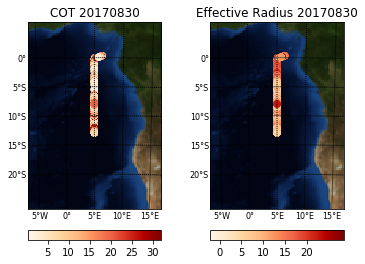

files to process: 
['..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170831T080655Z_V001-20170831T200329Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170831T082200Z_V001-20170831T200318Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170831T082721Z_V001-20170831T200432Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170831T101028Z_V001-20170831T200531Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170831T102321Z_V001-20170831T200641Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predi

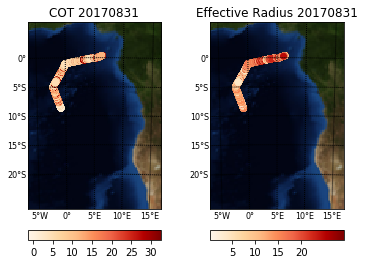

files to process: 
['..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170902T091924Z_V001-20170904T233759Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170902T093629Z_V001-20170904T234108Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170902T113508Z_V001-20170904T234017Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170902T115140Z_V001-20170904T234226Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut0//ref_i_ref_q\\20170902T132750Z_V001-20170904T234528Z_NN_ref_i_ref_q_000_P3_ref_i_ref_q_000_prediction_lut_scale_with_lut_0.txt', '..//..//py_data//oracles_NN//input2NN//predi

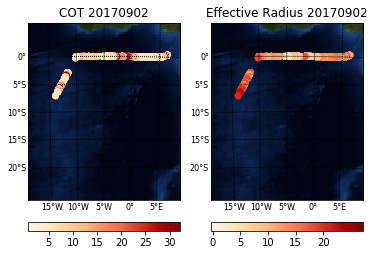

In [13]:
#ORACLES 2016
#data_dir = '..//..//py_data//oracles_NN//input2NN//predictions//lut9//'
#plotRSPlatlon(data_dir,"20160927","ER-2")

#data_dir = '..//..//py_data//oracles_NN//input2NN//predictions//lut9//'
#plotRSPlatlon_winput(data_dir,"20160927","ER-2",-30.,5.,15.,5.,2500000,3500000)

#ORACLES 2017
data_dir = '..//..//py_data//oracles_NN//input2NN//predictions//lut0//'
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170801","P-3",10.,30.,15.,-70.,4000000,3000000)
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170807","P-3",-20.,15,0,-40.,5000000,3500000)# transit
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170809","P-3",-20.,5.,-10,-5.,3000000,3500000)# including ASI
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170812","P-3",-20.,5.,-10,5.,2500000,3500000)# Routine/TMS
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170813","P-3",-20.,5.,-10,5.,2500000,3500000)# Routine/TMS
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170815","P-3",-20.,5.,-10,5.,2500000,3500000)# Routine/TMS
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170817","P-3",-20.,5.,-10,5.,2500000,3500000)# Routine/TMS
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170818","P-3",-20.,5.,-10,5.,2500000,3500000)# Routine/TMS
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170819","P-3",-20.,5.,-10,5.,2500000,3500000)# Routine/TMS
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170821","P-3",-20.,5.,-10,-5.,3000000,3500000)# including ASI
#plotRSPlatlon_winput(data_dir,"ref_i_ref_q","20170824","P-3",-20.,5.,-10,5.,2500000,3500000)# Routine/TMS
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170826","P-3",-20.,5.,-10,5.,2500000,3500000)# Routine/TMS
#plotRSPlatlon_winput(data_dir,"ref_q_dolp","20170828","P-3",-20.,5.,-10,5.,2500000,3500000)# Routine/TMS
plotRSPlatlon_winput(data_dir,"ref_i_ref_q","20170830","P-3",-20.,5.,-10,5.,2500000,3500000)# Routine/TMS
plotRSPlatlon_winput(data_dir,"ref_i_ref_q","20170831","P-3",-20.,5.,-10,5.,2500000,3500000)# Routine/TMS
plotRSPlatlon_winput(data_dir,"ref_i_ref_q","20170902","P-3",-20.,5.,-10,-5.,3000000,3500000)# including ASI

files to process: 
['..//..//py_data//oracles_NN//input2NN//predictions//lut9\\20160910T095856Z_V001-20160912T173255Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt']
..//..//py_data//oracles_NN//input2NN//predictions//lut9\20160910T095856Z_V001-20160912T173255Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt
     UTC_hr      Alt_m  Latitude  Longitude        SZA  RelativeAzimuth  \
0  9.982478  19711.029 -8.644539   8.583966  24.576456        11.543930   
1  9.982712  19711.922 -8.646128   8.583659  24.575111        11.756104   
2  9.982946  19712.844 -8.647714   8.583242  24.573763        11.963852   
3  9.983180  19713.604 -8.649343   8.582593  24.572412        12.155991   
4  9.983413  19714.305 -8.651039   8.581957  24.571064        12.333252   

   Effective_Radius  Effective_Variance        COT  
0          7.109933            0.011993  10.167836  
1          7.092804            0.012262  10.389658  
2          7.117546            0.012

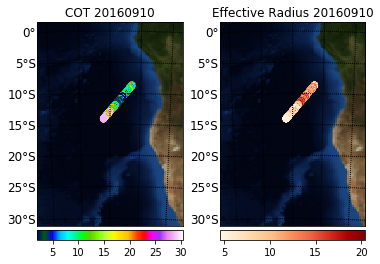

files to process: 
['..//..//py_data//oracles_NN//input2NN//predictions//lut9\\20160912T123215Z_V001-20160913T184158Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt']
..//..//py_data//oracles_NN//input2NN//predictions//lut9\20160912T123215Z_V001-20160913T184158Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt
      UTC_hr      Alt_m   Latitude  Longitude        SZA  RelativeAzimuth  \
0  12.607610  19768.031 -10.469929   0.478533  17.657789        10.637085   
1  12.607844  19768.402 -10.471026   0.479587  17.661282        10.637680   
2  12.608078  19780.057 -10.472050   0.480844  17.664785        10.645447   
3  12.608311  19779.498 -10.473012   0.482211  17.668280        10.668991   
4  12.608545  19779.031 -10.473994   0.483366  17.671772        10.677368   

   Effective_Radius  Effective_Variance        COT  
0         10.008064            0.009194  14.374656  
1          9.097334            0.008752  14.877640  
2          8.863897     

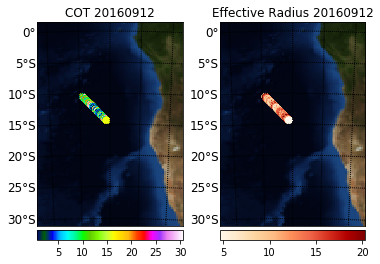

files to process: 
['..//..//py_data//oracles_NN//input2NN//predictions//lut9\\20160914T084537Z_V001-20160918T162709Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut9\\20160914T111716Z_V001-20160918T163554Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt']
..//..//py_data//oracles_NN//input2NN//predictions//lut9\20160914T084537Z_V001-20160918T162709Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt
     UTC_hr      Alt_m   Latitude  Longitude        SZA  RelativeAzimuth  \
0  8.760329  19567.441 -15.742884  10.078691  41.374287        14.296829   
1  8.760562  19569.605 -15.742289  10.077554  41.372700        14.201691   
2  8.760796  19571.361 -15.741850  10.076300  41.371113        14.106552   
3  8.761030  19572.727 -15.741633  10.074871  41.369526        14.004379   
4  8.761264  19573.643 -15.741365  10.073492  41.367943        13.906296   

   Effective_Radius 

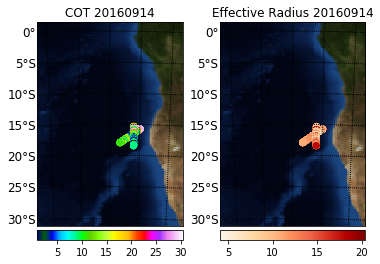

files to process: 
['..//..//py_data//oracles_NN//input2NN//predictions//lut9\\20160922T104008Z_V001-20160923T150110Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt', '..//..//py_data//oracles_NN//input2NN//predictions//lut9\\20160922T115945Z_V001-20160923T151759Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt']
..//..//py_data//oracles_NN//input2NN//predictions//lut9\20160922T104008Z_V001-20160923T150110Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt
      UTC_hr      Alt_m   Latitude  Longitude        SZA  RelativeAzimuth  \
0  10.669119  19792.398 -10.254206  -0.191396  20.785408        26.342133   
1  10.669352  19791.758 -10.254463  -0.193800  20.783751        26.000519   
2  10.669586  19791.217 -10.254735  -0.196192  20.782093        25.686264   
3  10.669820  19790.697 -10.255095  -0.198518  20.780443        25.402756   
4  10.670053  19790.178 -10.255604  -0.200679  20.778793        25.153412   

   Effective_R

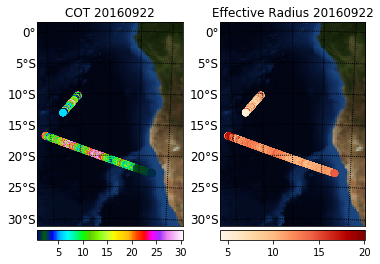

files to process: 
['..//..//py_data//oracles_NN//input2NN//predictions//lut9\\20160924T101315Z_V001-20160926T202313Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt']
..//..//py_data//oracles_NN//input2NN//predictions//lut9\20160924T101315Z_V001-20160926T202313Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt
      UTC_hr      Alt_m  Latitude  Longitude        SZA  RelativeAzimuth  \
0  10.220994  19514.314 -8.260910  10.705906  15.656738        17.428833   
1  10.221228  19518.613 -8.263040  10.707445  15.655159        17.799423   
2  10.221462  19521.971 -8.265307  10.708822  15.653578        18.186310   
3  10.221696  19524.869 -8.267455  10.710246  15.651997        18.585709   
4  10.221929  19527.330 -8.268608  10.712198  15.650414        18.947876   

   Effective_Radius  Effective_Variance       COT  
0         13.131900            0.079179  6.281496  
1         11.385201            0.045585  6.228783  
2         11.152974            0.

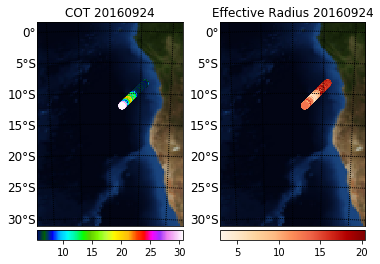

files to process: 
['..//..//py_data//oracles_NN//input2NN//predictions//lut9\\20160927T102159Z_V001-20160927T211209Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt']
..//..//py_data//oracles_NN//input2NN//predictions//lut9\20160927T102159Z_V001-20160927T211209Z_NN_ref_i_dolp_090_ref_i_dolp_090_prediction_lut_scale_with_lut_9.txt
      UTC_hr      Alt_m  Latitude  Longitude        SZA  RelativeAzimuth  \
0  10.366607  19817.563 -5.055108   8.693168  13.708609         2.031876   
1  10.366841  19816.898 -5.056820   8.692273  13.706722         2.183823   
2  10.367075  19816.188 -5.058518   8.691368  13.704836         2.331345   
3  10.367308  19815.393 -5.060203   8.690453  13.702950         2.475800   
4  10.367542  19814.473 -5.061899   8.689570  13.701063         2.611938   

   Effective_Radius  Effective_Variance       COT  
0         16.262910            0.156193  3.440649  
1         16.101022            0.156871  3.382408  
2         12.997275            0.

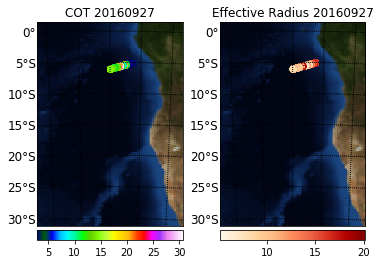

In [65]:
# loop over all campaign dates to get plots
flight_dates = ['20160910','20160912', '20160914', '20160922', '20160924', '20160927']
data_dir = '..//..//py_data//oracles_NN//input2NN//predictions//lut9//'

for f in range(len(flight_dates)):
    plotRSPlatlon(data_dir,flight_dates[f],"ER-2")